# 时间数列

时间序列(time series)数据是一种重要的结构化数据形式。在多个时间点或测量到的任何事物都可以形成一段时间序列。

- 很多时间序列是固定频率的 - 数据点根据某种规律定期出现
- 时间序列也可以是不定期的

时间序列的意义取决于具体的应用场景：

- 时间戳（timestamp），特定的时刻
- 固定时期（period），如2007年1月或2010年全年
- 时间间隔（interval），由起始和结束时间戳表示。时期可以看成间隔的特例
- 实验或过程事件，每个时间点都是相对于特定起始时间的一个度量。例如，从放入烤箱开始，每秒每种饼干的直径

In [1]:
%pylab inline

import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


## 日期和时间数据类型及工具

In [2]:
from datetime import datetime, timedelta

In [3]:
# datetime 以毫秒形式存储日期和时间
now = datetime.now()
now

datetime.datetime(2017, 4, 20, 11, 22, 39, 905577)

In [4]:
now.year, now.month, now.day, now.hour, now.minute, now.second, now.microsecond

(2017, 4, 20, 11, 22, 39, 905577)

In [5]:
# timedelta 表示两个 datetime 对象之间的时间差
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days, delta.seconds, delta.microseconds

(926, 56700, 0)

In [7]:
now + timedelta(1,1,1) # days, seconds, microseconds

datetime.datetime(2017, 4, 21, 11, 22, 40, 905578)

datetime 模块中的数据类型

类型 | 说明
---|---
`date` | 以公历形式存储日历日期（年、月、日）
`time` | 将时间存储为时、分、秒、毫秒
`datetime` | 存储日期和时间
`timedelta` | 表示两个 datetime 值之间的差（日、秒、毫秒）

### 字符串和 datetime 的相互转换

In [8]:
# 字符串转 datetime
stamp = datetime(2011, 1, 3)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [9]:
# datetime 转字符串
value = "2011-01-03"
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [10]:
# dateutil 几乎能解析所有日期形式
from dateutil.parser import parse
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [11]:
# pandas 可以解析许多不同的日期表示形式
datestrs = ['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

datetime 格式定义

代码 | 说明
---|---
`%Y` | 4位数的年
`%y` | 2位数的年
`%m` | 2位数的月 [01,12]
`%d` | 2位数的日 [01,31]
`%H` | 时（24小时制）[00,23]
`%I` | 时（12小时制）[01,12]
`%M` | 2位数的分[00,59]
`%S` | 秒[00,61]，60,61闰秒
`%w` | 整数表示的星期几[0(星期日),6]
`%U` | 每年的第几周[00,53]，星期日为每周的第一天
`%W` | 每年的第几周[00,53]，星期一为每周的第一天
`%z` | 以+HHMM或-HHMM表示UTC时区偏移量
`%F` | `%Y-%m-%d` 简写形式,如 2012-4-18
`%D` | `%m/%d/%y` 简写形式,如 04/18/12

In [12]:
datetime.strftime(now, 'Y: %Y, y: %y, m: %m, d: %d, H: %H, I: %I, M: %M, S: %S, w: %w, U: %U, W: %W, z: %z, F: %F, D: %D')

'Y: 2017, y: 17, m: 04, d: 20, H: 11, I: 11, M: 22, S: 39, w: 4, U: 16, W: 16, z: , F: 2017-04-20, D: 04/20/17'

特定于当前环境的日期格式

代码 | 说明
---|---
`%a` | 星期几简写
`%A` | 星期几全写
`%b` | 月份简写
`%B` | 月份全写
`%c` | 完整的日期与时间
`%p` | 不同环境的 AM/PM
`%x` | 适合于当前环境的日期格式
`%X` | 适合于当前环境的时间格式

In [13]:
datetime.strftime(now, "a: %a, A: %A, b: %b, B: %B, c: %c, p: %p, x: %x, X: %X")

'a: Thu, A: Thursday, b: Apr, B: April, c: Thu Apr 20 11:22:39 2017, p: AM, x: 04/20/17, X: 11:22:39'

## 时间序列基础

In [14]:
dates = [
    datetime(2011,1,2),
    datetime(2011,1,5),
    datetime(2011,1,7),
    datetime(2011,1,8),
    datetime(2011,1,10),
    datetime(2011,1,12)]

ts = Series(np.arange(6), index=dates)
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [15]:
# datatime 对象被放在 DatetimeIndex
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [16]:
# 不同索引的时间序列之间的算术运算会自动按日期对齐
ts + ts[::2]

2011-01-02    0.0
2011-01-05    NaN
2011-01-07    4.0
2011-01-08    NaN
2011-01-10    8.0
2011-01-12    NaN
dtype: float64

In [17]:
# DatetimeIndex 中的各个标量值是 timestamp(视需要自动转换为datetime对象)
ts.index[0]

Timestamp('2011-01-02 00:00:00')

### 索引、选取、子集构造

In [18]:
# index
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [19]:
# select by timestamp
ts[stamp]

2

In [20]:
# select by time-formated string
ts['1/7/2011'], ts['20110107']

(2, 2)

In [21]:
# 较长的时间序列（freq=day）
lts = Series(np.arange(1000), index=pd.date_range('1/1/2000', periods=1000))
lts.head()

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int64

In [22]:
# 选取”年”范围
len(lts['2001'])

365

In [23]:
# 选取“月”范围
len(lts['2001-05'])

31

In [24]:
# 切片选取
len(lts['2001-05':'2001-06'])

61

In [25]:
# 切片选取
len(lts['20010501':'20010630'])

61

In [26]:
# 切片选取
len(lts[datetime(2001,5,1):datetime(2001,6,30)])

61

In [27]:
# 对 DataFrame 根据时间进行切片
long_df = DataFrame(
    np.arange(400).reshape((100,4)),
    index = pd.date_range('1/1/2000', periods=100, freq='W-WED'),
    columns = ['A', 'B', 'C', 'D']
)
long_df.ix['2001-05']

,A,B,C,D
2001-05-02,276,277,278,279
2001-05-09,280,281,282,283
2001-05-16,284,285,286,287
2001-05-23,288,289,290,291
2001-05-30,292,293,294,295


### 带有重复索引的时间序列

In [28]:
dates = pd.DatetimeIndex([
    '1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'
])

dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [29]:
dup_ts['20000101']

0

In [30]:
dup_ts['20000102']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [31]:
# 对具有非唯一时间戳的数据进行聚合
dup_ts.groupby(level=0).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [32]:
dup_ts.groupby(dup_ts.index).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

## 日期的范围、频率以及移动

pandas 的时间序列一般被认为是不规则的，没有固定频率，所以常常需要以某种相对固定的频率进行分析，比如每日、每月、每15分钟等。

pandas 有一套标准的时间序列频率以及由于重采样、频率推断、生成固定频率日期范围的工具。

In [33]:
ts

2011-01-02    0
2011-01-05    1
2011-01-07    2
2011-01-08    3
2011-01-10    4
2011-01-12    5
dtype: int64

In [34]:
# 重采样
ts.resample('D').ffill()

2011-01-02    0
2011-01-03    0
2011-01-04    0
2011-01-05    1
2011-01-06    1
2011-01-07    2
2011-01-08    3
2011-01-09    3
2011-01-10    4
2011-01-11    4
2011-01-12    5
Freq: D, dtype: int64

### 生成日期范围

使用 pandas.date_range 生成指定长度的 DatetimeIndex

In [35]:
# 给起始、结束日期
pd.date_range('1/1/2000', '1/5/2000')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# DatetimeIndex 包含一组 datetime 的时间"点"
from datetime import datetime
pd.DatetimeIndex([datetime(2000,1,1),
                  datetime(2000,1,2),
                  datetime(2000,1,3),
                  datetime(2000,1,4),
                  datetime(2000,1,5)])

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq=None)

In [37]:
# 给表示一段时间的数字 periods
pd.date_range('1/1/2000', periods=5)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [38]:
# 给定频率 freq
pd.date_range('1/1/2000', periods=5, freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [39]:
# date_range预设保留时间信息
pd.date_range('5/2/2012 12:23:56', periods=5)

DatetimeIndex(['2012-05-02 12:23:56', '2012-05-03 12:23:56',
               '2012-05-04 12:23:56', '2012-05-05 12:23:56',
               '2012-05-06 12:23:56'],
              dtype='datetime64[ns]', freq='D')

In [40]:
# normalize 规范化日期到午夜的时间戳
pd.date_range('5/2/2012 12:23:56', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏移量

pasdas 的频率 = 基础频率（base frequency）x 乘数
- 基础频率："M"表示月，"H"表示小时
- 每个基础频率都有一个日期偏移量（date offset）的对象与之对应

In [41]:
from pandas.tseries.offsets import Hour, Minute
freq = Hour(5) + Minute(30)

In [42]:
pd.date_range('1/1/2000', periods=4, freq=freq)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:30:00',
               '2000-01-01 11:00:00', '2000-01-01 16:30:00'],
              dtype='datetime64[ns]', freq='330T')

In [43]:
pd.date_range('1/1/2000', periods=4, freq='5h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:30:00',
               '2000-01-01 11:00:00', '2000-01-01 16:30:00'],
              dtype='datetime64[ns]', freq='330T')

In [44]:
dates = pd.date_range('1/1/2000', periods=4, freq='WOM-3FRI')
dates.strftime('%w')

array([u'5', u'5', u'5', u'5'], 
      dtype='<U1')

时间序列的基础频率

别名 | 偏移量类型 | 说明
---|---|---
`D`                   | Day                  | 每日历日
`B`                   | BusinessDay          | 每工作日
`H`                   | Hour                 | 每小时
`T`,`min`             | Minute               | 每分钟
`S`                   | Second               | 每秒
`L`,`ms`              | Milli                | 每毫秒 (1s/1000)
`U`                   | Micro                | 每微秒 (1s/1000,000)
`M`                   | MonthEnd             | 每月最末个日历日
`BM`                  | BusinessMonthEnd     | 每月最末个工作日
`MS`                  | MonthBegin           | 每月第一个日历日
`BMS`                 | BusinessMonthBegin   | 每月第一个工作日
`W-MON`,`W-TUE`       | WeekDay              | 每周的星期几
`WOM-1MON`,`WOM-2MON` | WeekOfMonth          | 每月的第几个星期
`Q-JAN`,`Q-FEB`       | QuarterEnd           | 每季最后一月最末个日历日
`BQ-JAN`,`BQ-FEB`     | BusinessQuarterEnd   | 每季最后一月最末个工作日
`QS-JAN`,`QS-FEB`     | QuarterBegin         | 每季最后一月第一个日历日
`BQS-JAN`,`BQS-FEB`   | BusinessQuarterBegin | 每季最后一月第一个工作日
`A-JAN`,`A-FEB`       | YearEnd              | 每年最后一月最末个日历日
`BA-JAN`,`BA-FEB`     | BusinessYearEnd      | 每年最后一月最末个工作日
`AS-JAN`,`AS-FEB`     | YearBegin            | 每年最后一月第一个日历日
`BAS-JAN`,`BAS-FEB`   | BusinessYearBegin    | 每年最后一月第一个工作日

公式：[日历日、工作日][周期][开始、结束]-[指定时间]
- 日历日(_)、工作日(B)
- 周期: 周(W)、月(M)、每月周(WOM)、季(Q)、年(A)
- 开始(S)、结束(_)

In [45]:
start='2017/1/1'
print pd.date_range(start=start, periods=2, freq='D')
print pd.date_range(start=start, periods=2, freq='B')

DatetimeIndex(['2017-01-01', '2017-01-02'], dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq='B')


In [46]:
start='2017/1/1'
print pd.date_range(start=start, periods=2, freq='H')
print pd.date_range(start=start, periods=2, freq='T')
print pd.date_range(start=start, periods=2, freq='S')
print pd.date_range(start=start, periods=2, freq='L')
print pd.date_range(start=start, periods=2, freq='U')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00'], dtype='datetime64[ns]', freq='H')
DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:01:00'], dtype='datetime64[ns]', freq='T')
DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01'], dtype='datetime64[ns]', freq='S')
DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:00.001000'], dtype='datetime64[ns]', freq='L')
DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:00.000001'], dtype='datetime64[ns]', freq='U')


In [47]:
start='2015/1/1'
print pd.date_range(start=start, periods=2, freq='M')
print pd.date_range(start=start, periods=2, freq='BM')
print pd.date_range(start=start, periods=2, freq='MS')
print pd.date_range(start=start, periods=2, freq='BMS')

DatetimeIndex(['2015-01-31', '2015-02-28'], dtype='datetime64[ns]', freq='M')
DatetimeIndex(['2015-01-30', '2015-02-27'], dtype='datetime64[ns]', freq='BM')
DatetimeIndex(['2015-01-01', '2015-02-01'], dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2015-01-01', '2015-02-02'], dtype='datetime64[ns]', freq='BMS')


In [48]:
start='2015/1/1'
print pd.date_range(start=start, periods=2, freq='W-FRI')
print pd.date_range(start=start, periods=2, freq='WOM-3FRI')

DatetimeIndex(['2015-01-02', '2015-01-09'], dtype='datetime64[ns]', freq='W-FRI')
DatetimeIndex(['2015-01-16', '2015-02-20'], dtype='datetime64[ns]', freq='WOM-3FRI')


In [49]:
start='2015/1/1'
print pd.date_range(start=start, periods=2, freq='Q-JAN')
print pd.date_range(start=start, periods=2, freq='BQ-JAN')
start='2017/1/1'
print pd.date_range(start=start, periods=2, freq='QS-JAN')
print pd.date_range(start=start, periods=2, freq='BQS-JAN')

DatetimeIndex(['2015-01-31', '2015-04-30'], dtype='datetime64[ns]', freq='Q-JAN')
DatetimeIndex(['2015-01-30', '2015-04-30'], dtype='datetime64[ns]', freq='BQ-JAN')
DatetimeIndex(['2017-01-01', '2017-04-01'], dtype='datetime64[ns]', freq='QS-JAN')
DatetimeIndex(['2017-01-02', '2017-04-03'], dtype='datetime64[ns]', freq='BQS-JAN')


In [50]:
start='2015/1/1'
print pd.date_range(start=start, periods=2, freq='A-JAN')
print pd.date_range(start=start, periods=2, freq='BA-JAN')
start='2017/1/1'
print pd.date_range(start=start, periods=2, freq='AS-JAN')
print pd.date_range(start=start, periods=2, freq='BAS-JAN')

DatetimeIndex(['2015-01-31', '2016-01-31'], dtype='datetime64[ns]', freq='A-JAN')
DatetimeIndex(['2015-01-30', '2016-01-29'], dtype='datetime64[ns]', freq='BA-JAN')
DatetimeIndex(['2017-01-01', '2018-01-01'], dtype='datetime64[ns]', freq='AS-JAN')
DatetimeIndex(['2017-01-02', '2018-01-01'], dtype='datetime64[ns]', freq='BAS-JAN')


### 移动（超前、滞后）数据

shift 指的是沿着时间轴将数据前移或后移。执行单纯前移或后移操作，保持索引不变。

In [51]:
ts = Series(np.arange(4)+1, index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1
2000-02-29    2
2000-03-31    3
2000-04-30    4
Freq: M, dtype: int64

In [52]:
ts.shift(1)

2000-01-31    NaN
2000-02-29    1.0
2000-03-31    2.0
2000-04-30    3.0
Freq: M, dtype: float64

In [53]:
ts.shift(3, freq='D')

2000-02-03    1
2000-03-03    2
2000-04-03    3
2000-05-03    4
dtype: int64

In [54]:
ts.shift(1, freq='3D')

2000-02-03    1
2000-03-03    2
2000-04-03    3
2000-05-03    4
dtype: int64

In [55]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1
2000-02-29 01:30:00    2
2000-03-31 01:30:00    3
2000-04-30 01:30:00    4
Freq: M, dtype: int64

### 通过偏移量对日期进行位移

In [56]:
from pandas.tseries.offsets import Day, MonthEnd

In [57]:
now = datetime.now()
now

datetime.datetime(2017, 4, 20, 11, 22, 40, 720606)

In [58]:
now + 3*Day(), now + Day(3)

(Timestamp('2017-04-23 11:22:40.720606'),
 Timestamp('2017-04-23 11:22:40.720606'))

In [59]:
now + MonthEnd(), now + MonthEnd(2)

(Timestamp('2017-04-30 11:22:40.720606'),
 Timestamp('2017-05-31 11:22:40.720606'))

In [60]:
# 通过锚点偏移量的 rollforward, rollback 显式将日期向前或向后“滚动”
offset = MonthEnd()
offset.rollforward(now), offset.rollback(now)

(Timestamp('2017-04-30 11:22:40.720606'),
 Timestamp('2017-03-31 11:22:40.720606'))

In [61]:
ts = Series(np.arange(100), index=pd.date_range('1/1/2000', periods=100))

# 结合 groupby 使用滚动方法
ts.groupby(offset.rollforward).count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
dtype: int64

In [62]:
# 透过 resample 
ts.resample('M').count()

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

## 时区处理

In [63]:
import pytz

In [64]:
pytz.timezone('Asia/Shanghai')

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

### 本地化和转换

In [65]:
ts = Series(np.arange(3), index = pd.date_range('1/1/2000', periods=3))
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
Freq: D, dtype: int64

In [66]:
print ts.index.tz

None


In [67]:
# 从单纯到本地化的转换
ts_utc = ts.tz_localize('UTC')
ts_utc

2000-01-01 00:00:00+00:00    0
2000-01-02 00:00:00+00:00    1
2000-01-03 00:00:00+00:00    2
Freq: D, dtype: int64

In [68]:
Series(np.arange(3), index = pd.date_range('1/1/2000', periods=3, tz='UTC'))

2000-01-01 00:00:00+00:00    0
2000-01-02 00:00:00+00:00    1
2000-01-03 00:00:00+00:00    2
Freq: D, dtype: int64

In [69]:
print ts_utc.index.tz

UTC


In [70]:
# 从某个时区转换到别的时区
ts_utc.tz_convert('US/Eastern')

1999-12-31 19:00:00-05:00    0
2000-01-01 19:00:00-05:00    1
2000-01-02 19:00:00-05:00    2
Freq: D, dtype: int64

### 操作时区意识型 Timestamp 对象

时间序列和日期范围差不多，Timpstamp 对象能从
- 单纯性（naive）本地化为时区
- 从一个时区转换到另一个时区

In [71]:
# 本地化，再转换时区
pd.Timestamp('1/1/2000 4:00').tz_localize('UTC').tz_convert('US/Eastern')

Timestamp('1999-12-31 23:00:00-0500', tz='US/Eastern')

In [72]:
# 创建时传入时区，再转换时区
pd.Timestamp('1/1/2000 4:00', tz='UTC').tz_convert('US/Eastern')

Timestamp('1999-12-31 23:00:00-0500', tz='US/Eastern')

In [73]:
stamp = pd.Timestamp('1/1/2000 4:00', tz='UTC')
stamp.tz_convert('US/Mountain').value, stamp.tz_convert('US/Eastern').value

(946699200000000000, 946699200000000000)

### 不同时区之间的运算

In [74]:
rng = pd.date_range('1/1/2000', periods=5, freq='B')
ts = Series(np.arange(len(rng)), index=rng).tz_localize('UTC')

# 不同时区合并运算，结果是 UTC
ts[:].tz_convert('Europe/London') + ts[:].tz_convert('Europe/Moscow')

2000-01-03 00:00:00+00:00    0
2000-01-04 00:00:00+00:00    2
2000-01-05 00:00:00+00:00    4
2000-01-06 00:00:00+00:00    6
2000-01-07 00:00:00+00:00    8
Freq: B, dtype: int64

## 时期及其算术运算

时期（period）表示的是时间区间，如数日、数月、数季、数年。

In [75]:
# A-DEC: 日历日、年度、结束，指定12月最后一天
p = pd.Period(2007, freq='A-DEC')

# 表示 2007/1/1~2007/12/31 之间的整段的时间
p

Period('2007', 'A-DEC')

In [76]:
# 以年度为单位进行运算
p + 3

Period('2010', 'A-DEC')

In [77]:
# 创建规则的时期范围
rng = pd.period_range('2007', periods=2, freq='A-DEC')
rng

PeriodIndex(['2007', '2008'], dtype='period[A-DEC]', freq='A-DEC')

In [78]:
# PeriodIndex 包含一组 Period 的时间“范围”
from pandas import Period
pd.PeriodIndex([Period(2007, freq='A-DEC'),
                Period(2008, freq='A-DEC')])

PeriodIndex(['2007', '2008'], dtype='period[A-DEC]', freq='A-DEC')

In [79]:
Series(np.arange(3), index=pd.period_range('2007', periods=3, freq='8H'))

2007-01-01 00:00    0
2007-01-01 08:00    1
2007-01-01 16:00    2
Freq: 8H, dtype: int64

In [80]:
Series(np.arange(3), index=pd.period_range('2007', periods=3, freq='D'))

2007-01-01    0
2007-01-02    1
2007-01-03    2
Freq: D, dtype: int64

In [81]:
Series(np.arange(3), index=pd.period_range('2007', periods=3, freq='W'))

2007-01-01/2007-01-07    0
2007-01-08/2007-01-14    1
2007-01-15/2007-01-21    2
Freq: W-SUN, dtype: int64

In [82]:
Series(np.arange(3), index=pd.period_range('2007', periods=3, freq='M'))

2007-01    0
2007-02    1
2007-03    2
Freq: M, dtype: int64

In [83]:
Series(np.arange(3), index=pd.period_range('2007', periods=3, freq='Q'))

2007Q1    0
2007Q2    1
2007Q3    2
Freq: Q-DEC, dtype: int64

In [84]:
Series(np.arange(3), index=pd.period_range('2007', periods=3, freq='A'))

2007    0
2008    1
2009    2
Freq: A-DEC, dtype: int64

### 时期的频率转换

Period 和 PeriodIndex 对象可以通过 asfreq 方法被转换成别的频率。

In [85]:
# "年度时期" 转成当年的一个 "月度时期"
Period('2007', freq='A-DEC').asfreq('M', how='start')

Period('2007-01', 'M')

In [86]:
# "月度时期“ 转成当年的 ”年度时期“
Period('2007-8', freq='M').asfreq('A-JUN') # 2007/2 ~ 2008/1

Period('2008', 'A-JUN')

In [87]:
rng.asfreq('M', how='start'), rng.asfreq('M', how='end')

(PeriodIndex(['2007-01', '2008-01'], dtype='period[M]', freq='M'),
 PeriodIndex(['2007-12', '2008-12'], dtype='period[M]', freq='M'))

In [88]:
ts = Series(np.arange(3), index=pd.period_range('2006', periods=3, freq='A-DEC'))
ts

2006    0
2007    1
2008    2
Freq: A-DEC, dtype: int64

In [89]:
# 将 PeriodIndex 的频率转换为最后一个”工作日时期“
ts.asfreq('B', how='end')

2006-12-29    0
2007-12-31    1
2008-12-31    2
Freq: B, dtype: int64

### 按季度计算的时期频率

季度性数据会在会计、金融领域中见到。

In [90]:
# 'Q-JAN': 日历日、季度、结束，指定一月
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [91]:
# 季度时期：转换为日型频率就知道季度的范围（2011/11/01 ~ 2012/01/31）
p.asfreq('D', 'start'), p.asfreq('D', 'end')

(Period('2011-11-01', 'D'), Period('2012-01-31', 'D'))

In [92]:
# 获取该季度倒数第二个工作日下午4点的时间戳
((p.asfreq('B','e') - 1).asfreq('H', 's') + 16).to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [93]:
# 季度性的数据
ts = Series(np.arange(5),index=pd.period_range('2011Q3',periods=5,freq='Q-JAN'))
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
Freq: Q-JAN, dtype: int64

In [94]:
# 将 PeriodIndex 转换成 Timestamp
ts.index = ((ts.index.asfreq('B','e') - 1).asfreq('H','s') + 16).to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
dtype: int64

### 将 Timestamp 转换为 Period （及其反向过程）

In [95]:
rng = pd.date_range('1/1/2000', periods=6, freq='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06'],
              dtype='datetime64[ns]', freq='D')

In [96]:
# 转换成时期 Timestamp >> Period
# PeridoIndex 的频率由时间戳推断而来，允许存在重复时期
rng.to_period('M')

PeriodIndex(['2000-01', '2000-01', '2000-01', '2000-01', '2000-01', '2000-01'], dtype='period[M]', freq='M')

In [97]:
rng = pd.period_range('2000-01', periods=6, freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [98]:
# 转换为时间戳 Period >> Timestamp
rng.to_timestamp(how='end')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30'],
              dtype='datetime64[ns]', freq='M')

### 通过数组创建 PeriodIndex

In [99]:
# 固定频率的数据通常会将时间信息分开存放在多个列中。例如，下面的年度、季度
data = pd.read_csv('ch08/macrodata.csv')
data[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [100]:
# 将 year、quarter 两个数组及一个频率传入 PeriodIndex，合并成 DataFrame 的索引
data.index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
data[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## 重采样及频率转换

resample 指的是将时间序列从一个频率转换到另一个频率的处理过程
- 高频率数据聚合到低频率称为降采样（downsampling）
- 低频率数据聚合到高频率称为升采样（upsampling）

resample 方法的参数

参数 | 说明
---|---
`freq` | 重采样频率的字符串或DateOffset，如'M', '5min', Second(5)
~~`how='mean'`~~ | 用于产生聚合的函数或数据函数，如'mean', 'ohlc', 'first', 'last', 'median', 'max', 'min', np.max。默认为'meam'
`axis=0` | 重采样的轴
~~`fill_method='None'`~~ | 升采样如何插值，如'ffill','bfill'
`closed='right'` | 在降采样中，各时间段的那一端是闭合（包含的），'right', 'left'
`label='right'` | 在降采样 中，如何设置聚合值的标签，'right'或'left'
`loffset=None` | 面元标签的时间校正值，比如'-1s'/Second(-1)用于将聚合标签调早1秒
`limit=None` | 在向前或向后填充时，允许填充的最大时期数
`kind=None` | 聚合到时期（'period')或是时间戳（'timestamp'），默认聚合到时间序列的索引类型
`convertion=None` | 当重采样时期时，将低频转换到高频率所采用的约定('start'，'end')

加在 resample 后面的方法
- 降采样 how：'mean', 'ohlc', 'first', 'last', 'median', 'max', 'min'
- 升采样 fill_method: 'ffill','bfill' 

### 降采样

In [101]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)

# 每分钟 >> 每五分钟
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [102]:
# 区间那边是闭合的
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [103]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [104]:
# 对索引结果做一些位移
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

#### OHLC (Open-High-Low-Close) 重采样

经融领域的时间序列聚合方式，计算各面元的四个值：开盘、最高、最低、收盘

In [105]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### 通过groupby进行重采样

In [106]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)

# 根据月份进行分组
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

### 升采样和插值

在将数据从低频率转换到高频率，不需要聚合。但需要向前、向后插值。

In [107]:
frame = DataFrame(np.random.randn(3,4),
                 index=pd.date_range('1/1/2000', periods=3, freq='3D'),
                 columns=['A','B','C','D'])
frame

,A,B,C,D
2000-01-01,-0.214337,-0.807248,0.888047,-1.092837
2000-01-04,0.637767,1.190753,0.629046,0.617793
2000-01-07,0.759287,0.212125,-1.036189,0.291307


In [108]:
frame.resample('D').ffill()

,A,B,C,D
2000-01-01,-0.214337,-0.807248,0.888047,-1.092837
2000-01-02,-0.214337,-0.807248,0.888047,-1.092837
2000-01-03,-0.214337,-0.807248,0.888047,-1.092837
2000-01-04,0.637767,1.190753,0.629046,0.617793
2000-01-05,0.637767,1.190753,0.629046,0.617793
2000-01-06,0.637767,1.190753,0.629046,0.617793
2000-01-07,0.759287,0.212125,-1.036189,0.291307


由于时期指的是时间区间，升采样和降采样的规则比较严格
- 降采样中，目标频率必须是源频率的子时期（subperiod）
- 升采样中，目标频率必须是源频率的超时期（superperiod）

### 通过时期进行重采样

In [109]:
frame = DataFrame(np.random.randn(6,4),
                 index=pd.period_range('1-2000', periods=6, freq='M'),
                 columns=['A','B','C','D'])

In [110]:
# 降采样：月 >> 季
frame.resample('Q-DEC').mean()

,A,B,C,D
2000Q1,0.591889,0.200279,-0.060303,1.259890
2000Q2,-0.530469,-1.127960,-0.009405,0.527883


In [111]:
# 升采样：月 >> 周
frame.resample('W').ffill().head(12)

,A,B,C,D
1999-12-27/2000-01-02,0.855506,-1.805990,0.077699,0.784990
2000-01-03/2000-01-09,0.855506,-1.805990,0.077699,0.784990
2000-01-10/2000-01-16,0.855506,-1.805990,0.077699,0.784990
2000-01-17/2000-01-23,0.855506,-1.805990,0.077699,0.784990
2000-01-24/2000-01-30,0.855506,-1.805990,0.077699,0.784990
2000-01-31/2000-02-06,1.719048,0.525266,-0.820255,1.889834
2000-02-07/2000-02-13,1.719048,0.525266,-0.820255,1.889834
2000-02-14/2000-02-20,1.719048,0.525266,-0.820255,1.889834
2000-02-21/2000-02-27,1.719048,0.525266,-0.820255,1.889834
2000-02-28/2000-03-05,-0.798886,1.881562,0.561647,1.104848


## 时间序列绘图

In [112]:
close_px_all = pd.read_csv('ch09/stock_px.csv',
                           parse_dates=True,
                           index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [113]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


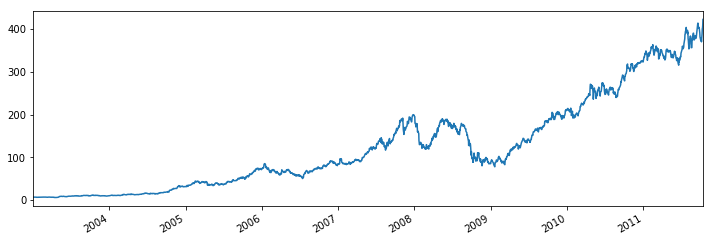

In [114]:
close_px['AAPL'].plot(figsize=(12,4))

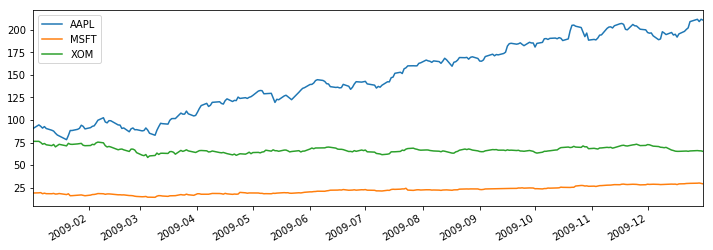

In [115]:
close_px['2009'].plot(figsize=(12,4))

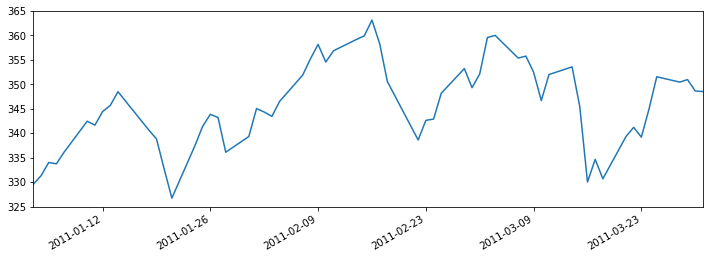

In [116]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot(figsize=(12,4))

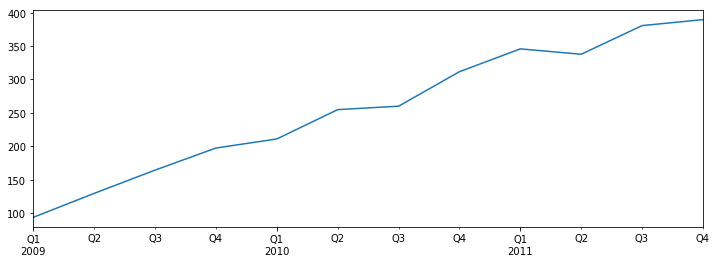

In [117]:
close_px['AAPL'].resample('Q-DEC').mean().ix['2009':].plot(figsize=(12,4))

## 移动窗口函数

在移动窗口上计算的各种统计函数是一种常见于时间序列的数组变换。

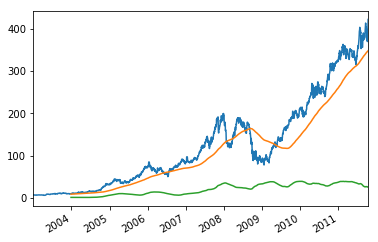

In [118]:
close_px.AAPL.plot()

# rolling（）.mean() 移动窗口计算平均
close_px.AAPL.rolling(250).mean().plot()
close_px.AAPL.rolling(250).std().plot()

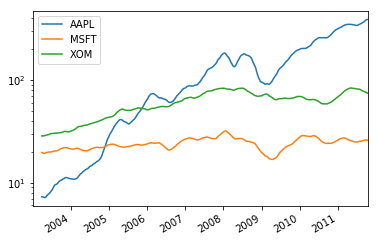

In [119]:
close_px.rolling(60).mean().plot(logy=True)

pandas 移动窗口和指数加权函数

函数 | 说明
---|---
`rolling.count` | 返回各窗口非NA观测值的数量
`rolling.sum` | 移动窗口的和
`rolling.mean` | 移动窗口的平均值
`rolling.median` | 移动窗口的中位数
`rolling.var` | 移动窗口的方差
`rolling.std` | 移动窗口的标准差
`rolling.skew` | 移动窗口的偏度（三阶矩）
`rolling.kurt` | 移动窗口的峰度（四阶矩）
`rolling.min` | 移动窗口的最小值
`rolling.max` | 移动窗口的最大值
`rolling.quantile` | 移动窗口的比分位数位置的值
`rolling.corr` | 移动窗口的相关系数
`rolling.cov` | 移动窗口的协方差
`rolling.apply` | 移动窗口应用普通数组函数
`ewma`    | 指数加权移动平均
`ewmvar`  | 指数加权移动方差
`ewmstd`  | 指数加权移动标准差
`ewmcorr` | 指数加权移动相关系数
`ewmcov`  | 指数加权移动协方差

[偏度](http://baike.baidu.com/link?url=dwG56IovjyllQBHrfE1l2-cZ3DlSt7tsKFaIV5SgPySMW8563LgiNKnhtLgXYBLT6Wtpfp3BVa8YKCzN3ELzOHJqMPz2qchcWYWGNC9ti3O)（skewness），是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。

正态分布的偏度为0，两侧尾部长度对称。若知道分布有可能在偏度上偏离正态分布时，可用偏离来检验分布的正态性。右偏时一般算术平均数>中位数>众数，左偏时相反，即众数>中位数>平均数。正态分布三者相等。

[峰度](http://baike.baidu.com/link?url=8N5x8dhbRga_ErsdWYQk7BX9U9hR-pRvUh0z2ePivDGwMnlsz6p9sAS-GDokwNZhGTIq95NHZhckrpXJTnr0mQqK4ES2s_Sa-NqIKoURDQa)（peakedness；kurtosis）又称峰态系数。表征概率密度分布曲线在平均值处峰值高低的特征数。直观看来，峰度反映了峰部的尖度。

根据均值不等式，可以确定出峰度（系数）的取值范围：它的下限不会低于1，上限不会高于数据的个数。有一些典型分布的峰度（系数）值得特别关注。例如，**正态分布**的峰度（系数）为常数3，**均匀分布**的峰度（系数）为常数1.8。在统计实践中，我们经常把这两个典型的分布曲线作为评价样本数据序列分布性态的参照。设若先将数据标准化，则峰度（系数）相当于标准化数据序列的四阶中心矩。所以，在相同的标准差下，峰度系数越大，分布就有更多的极端值，那么其余值必然要更加集中在众数周围，其分布必然就更加陡峭。

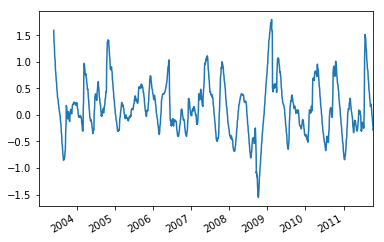

In [120]:
close_px.AAPL.rolling(100).skew().plot()

### 指数加权函数

另一种用固定大小窗口及相等权值观测值的办法是，定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权值。

指数加权统计回赋予近期观测值更大的权数，相对于等权统计能更适应更快的变化。

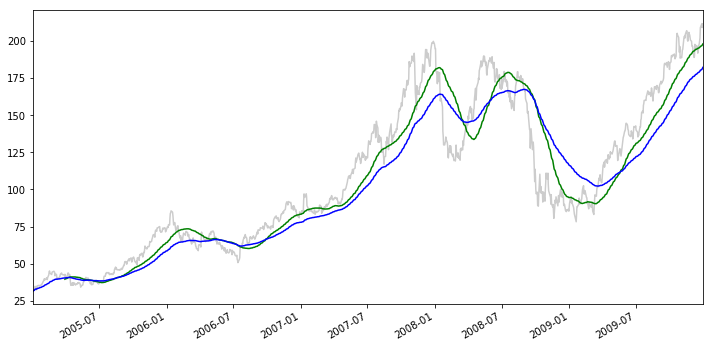

In [121]:
aapl_px = close_px.AAPL['2005':'2009']
aapl_px.plot(style='k', alpha=0.2, figsize=(12,6))
aapl_px.rolling(60).mean().plot(style='g')
aapl_px.ewm(60).mean().plot(style='b')

### 二元移动窗口函数

有些统计运算（相关系数、协方差）需要在两个时间序列上执行。例如，某股票对某个参考指数的相关系数。

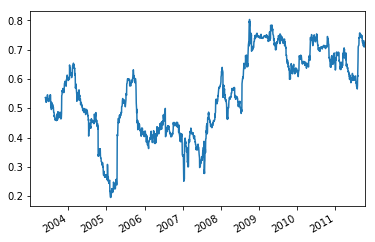

In [122]:
# SPX 指数变化
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1

# 各股股价变化
returns = close_px.pct_change()

# AAPL 与 SPX指数 的相关系数
returns.AAPL.rolling(125, min_periods=100).corr(spx_rets).plot()

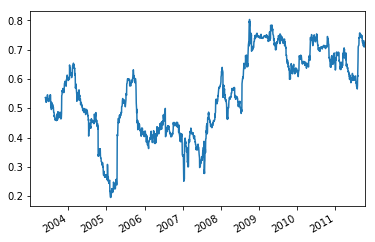

In [123]:
# 重写上面
rets = close_px_all.pct_change()
rets.AAPL.rolling(125, min_periods=100).corr(rets.SPX).plot()

### 用户定义的移动窗口函数

可以在移动窗口上应用自己设计的数组函数。唯一的要求：该函数要能从数组的各个片段中产生单个值（简约）

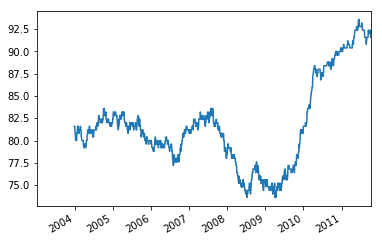

In [124]:
# 自定义函数
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)

# 应用自定义函数
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

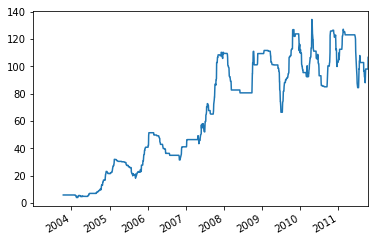

In [125]:
# 我的练习
peak = lambda x: x.max() - x.min()

close_px.AAPL.rolling(200).apply(peak).plot()

## 性能和内存使用方面的注意事项

- Timestamp 和 Period 都是用 64 bit整数表示，占用 8 byte内存空间
- pandas 会尽量在多个时间序列之间共享索引，创建现有时间序列的视图不会占用更多内存
- 运行时间与聚合结果的相对大小有关系，越高频聚合所耗费时间越多

In [126]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('1D').ohlc()

10 loops, best of 3: 105 ms per loop


In [127]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('1m').ohlc()

10 loops, best of 3: 109 ms per loop
